In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/tmp/ipykernel_253074/76635771.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


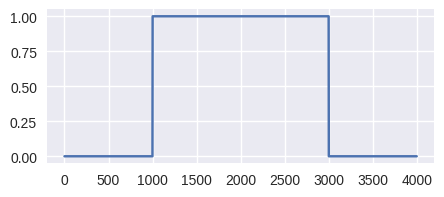

In [2]:
signal = np.heaviside(np.arange(-1000, 1000),1)
signal = np.concatenate((signal, signal[::-1]))
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(signal)

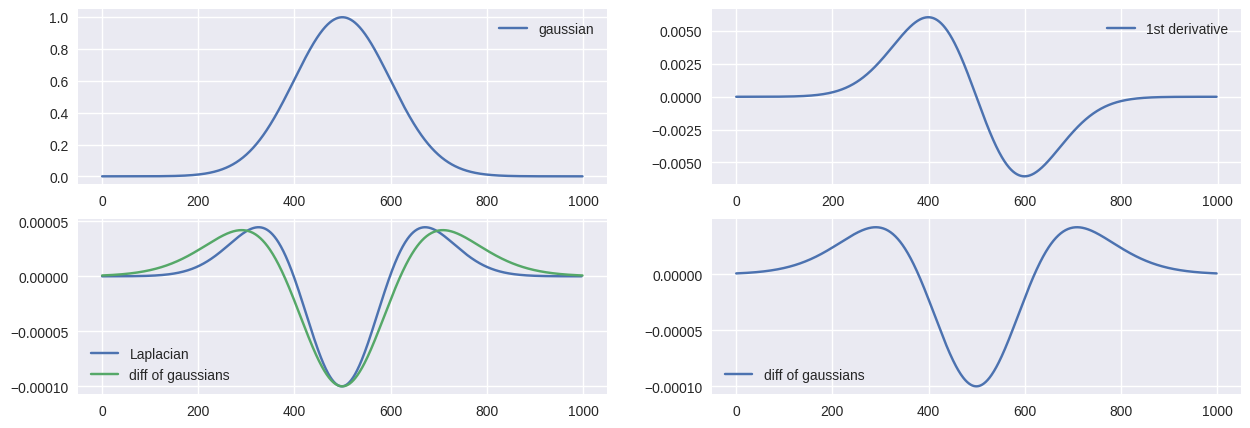

In [65]:
from numpy import diff

gaussian = sp.signal.gaussian(1000, 100)

d_gaussian = diff(gaussian)
d2_gaussian = diff(d_gaussian)

diff_gaussian = (sp.signal.gaussian(1000, 150) - 1.5*sp.signal.gaussian(1000, 100)) / (0.5*10000)

fig, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0][0].plot(gaussian, label='gaussian')
ax[0][1].plot(d_gaussian, label='1st derivative')
ax[1][0].plot(d2_gaussian, label='Laplacian')
ax[1][0].plot(diff_gaussian, label='diff of gaussians')
ax[1][1].plot(diff_gaussian, label='diff of gaussians')
for i in ax.flatten():
    i.legend()

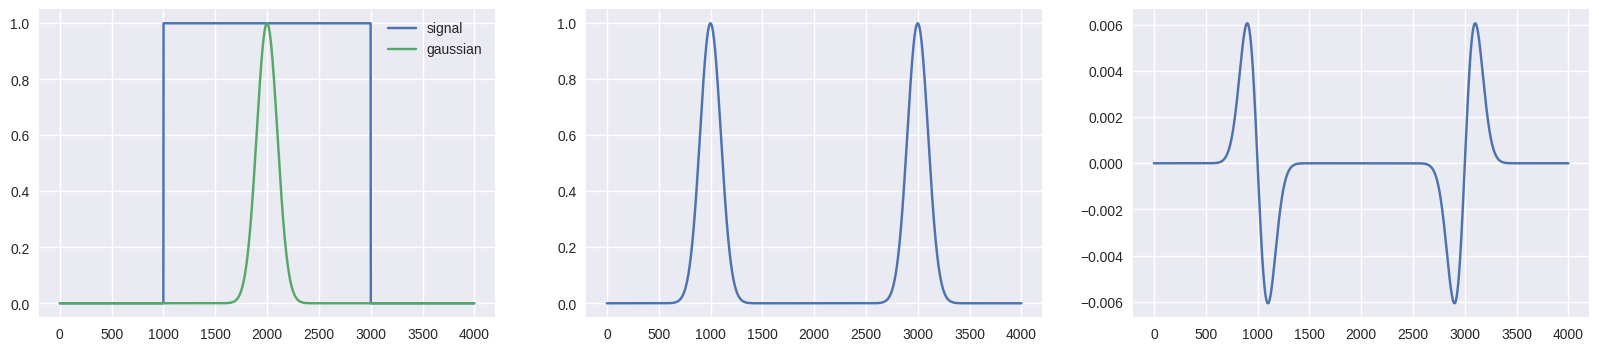

In [11]:
signal_d_gaussian = abs(np.convolve(signal, d_gaussian, mode='same'))
signal_d2_gaussian = np.convolve(signal, d2_gaussian, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax[0].plot(signal, label='signal')
ax[0].plot(np.pad(gaussian, 1500, mode='constant'), label='gaussian')
ax[0].legend()
ax[1].plot(signal_d_gaussian)
ax[2].plot(signal_d2_gaussian)

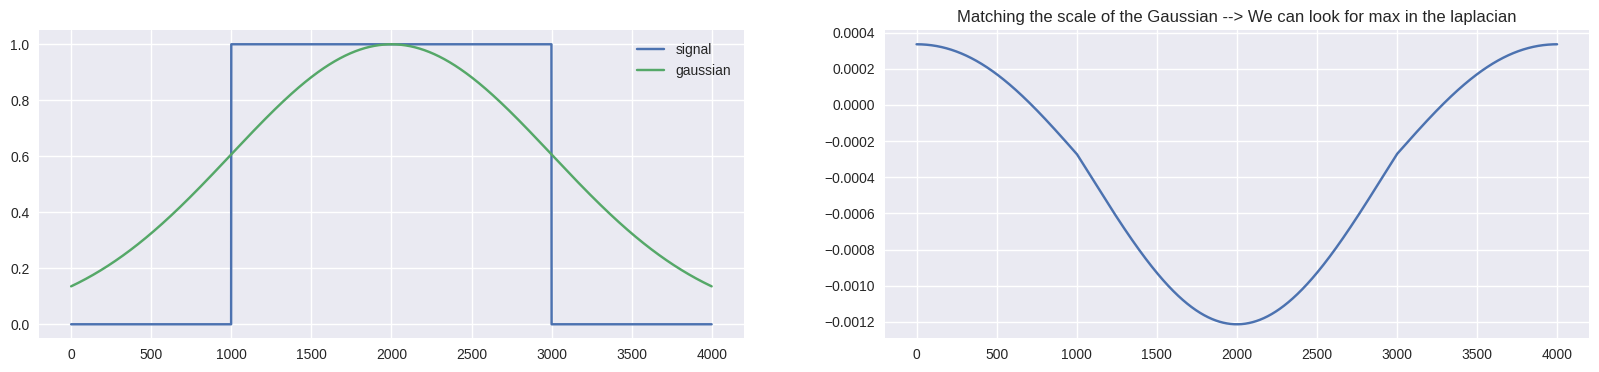

In [61]:
gaussian = sp.signal.gaussian(4000, 1000)
d_gaussian = diff(gaussian)
d2_gaussian = diff(d_gaussian)
signal_d_gaussian = abs(np.convolve(signal, d_gaussian, mode='same'))
signal_d2_gaussian = np.convolve(signal, d2_gaussian, mode='same')

fig, ax = plt.subplots(1, 2, figsize=(20, 4))
ax[1].set_title('Matching the scale of the Gaussian --> We can look for max in the laplacian')
ax[0].plot(signal, label='signal')
ax[0].plot(gaussian, label='gaussian')
ax[0].legend()
ax[1].plot(signal_d2_gaussian)